# EDA Linkedin Job Postings

In [85]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [92]:
file_path = 'job_postings.csv'
jobs = pd.read_csv(file_path)

In [93]:
jobs.head()

,job_id,company_id,title,description,max_salary,med_salary,min_salary,pay_period,formatted_work_type,location,...,closed_time,formatted_experience_level,skills_desc,listed_time,posting_domain,sponsored,work_type,currency,compensation_type,scraped
0,3757940104,553718.0,Hearing Care Provider,Overview\n\nHearingLife is a national hearing ...,NaN,5250.00,NaN,MONTHLY,Full-time,"Little River, SC",...,NaN,Entry level,NaN,1.699090e+12,careers-demant.icims.com,0,FULL_TIME,USD,BASE_SALARY,1699138101
1,3757940025,2192142.0,Shipping & Receiving Associate 2nd shift (Beav...,Metalcraft of Mayville\nMetalcraft of Mayville...,NaN,NaN,NaN,NaN,Full-time,"Beaver Dam, WI",...,NaN,NaN,NaN,1.699080e+12,www.click2apply.net,0,FULL_TIME,NaN,NaN,1699085420
2,3757938019,474443.0,"Manager, Engineering",\nThe TSUBAKI name is synonymous with excellen...,NaN,NaN,NaN,NaN,Full-time,"Bessemer, AL",...,NaN,NaN,Bachelor's Degree in Mechanical Engineering pr...,1.699080e+12,www.click2apply.net,0,FULL_TIME,NaN,NaN,1699085644
3,3757938018,18213359.0,Cook,descriptionTitle\n\n Looking for a great oppor...,NaN,22.27,NaN,HOURLY,Full-time,"Aliso Viejo, CA",...,NaN,Entry level,NaN,1.699080e+12,jobs.apploi.com,0,FULL_TIME,USD,BASE_SALARY,1699087461
4,3757937095,437225.0,Principal Cloud Security Architect (Remote),"Job Summary\nAt iHerb, we are on a mission to ...",275834.0,NaN,205956.0,YEARLY,Full-time,United States,...,NaN,Mid-Senior level,NaN,1.699090e+12,careers.iherb.com,0,FULL_TIME,USD,BASE_SALARY,1699085346


In [102]:
jobs.shape

(33246, 28)

This dataset contains 33,246 rows with 28 columns.

In [103]:
jobs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33246 entries, 0 to 33245
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   job_id                      33246 non-null  int64  
 1   company_id                  32592 non-null  float64
 2   title                       33246 non-null  object 
 3   description                 33245 non-null  object 
 4   max_salary                  11111 non-null  float64
 5   med_salary                  2241 non-null   float64
 6   min_salary                  11111 non-null  float64
 7   pay_period                  13352 non-null  object 
 8   formatted_work_type         33246 non-null  object 
 9   location                    33246 non-null  object 
 10  applies                     16238 non-null  float64
 11  original_listed_time        33246 non-null  float64
 12  remote_allowed              4802 non-null   float64
 13  views                       258

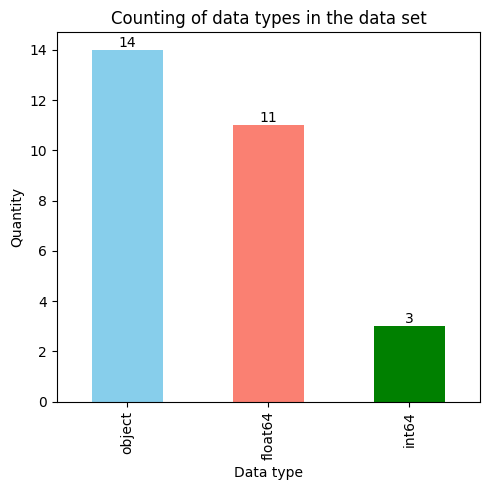

In [105]:
import matplotlib.pyplot as plt

data_types_counts = jobs.dtypes.value_counts()


colors = ['skyblue', 'salmon', 'green']

plt.figure(figsize=(5, 5))
bar_plot = data_types_counts.plot(kind='bar', color=colors)

plt.xlabel('Data type')
plt.ylabel('Quantity')
plt.title('Counting of data types in the data set')


for i, value in enumerate(data_types_counts):
    plt.text(i, value + 0, str(value), ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [94]:
jobs.dtypes

job_id                          int64
company_id                    float64
title                          object
description                    object
max_salary                    float64
med_salary                    float64
min_salary                    float64
pay_period                     object
formatted_work_type            object
location                       object
applies                       float64
original_listed_time          float64
remote_allowed                float64
views                         float64
job_posting_url                object
application_url                object
application_type               object
expiry                        float64
closed_time                   float64
formatted_experience_level     object
skills_desc                    object
listed_time                   float64
posting_domain                 object
sponsored                       int64
work_type                      object
currency                       object
compensation

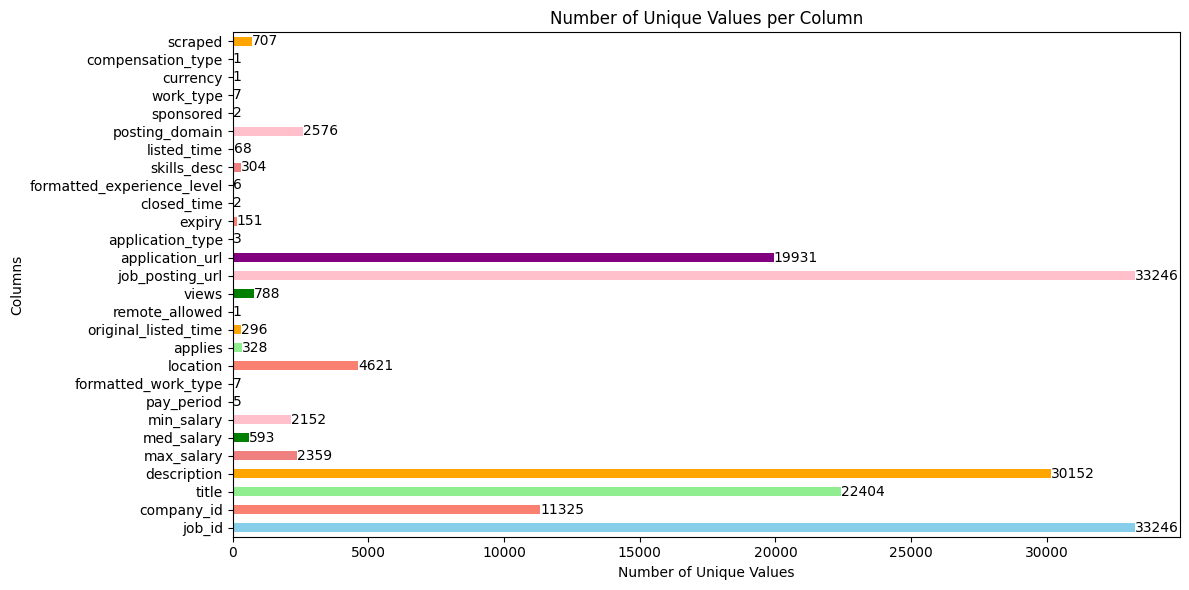

In [108]:
import matplotlib.pyplot as plt


unique_counts = jobs.nunique()


colors = ['skyblue', 'salmon', 'lightgreen', 'orange', 'lightcoral', 'green', 'pink', 'purple']

plt.figure(figsize=(12, 6)) 
bar_plot = unique_counts.plot(kind='barh', color=colors)

plt.ylabel('Columns')
plt.xlabel('Number of Unique Values')
plt.title('Number of Unique Values per Column')


for i, value in enumerate(unique_counts):
    plt.text(value, i, str(value), ha='left', va='center')


plt.tight_layout()
plt.show()

In [95]:
max_salary_count = jobs['max_salary'].count()
med_salary_count = jobs['med_salary'].count()
min_salary_count = jobs['min_salary'].count()

# Print the counts
print(f"Number of non-null values in 'max_salary': {max_salary_count}")
print(f"Number of non-null values in 'med_salary': {med_salary_count}")
print(f"Number of non-null values in 'min_salary': {min_salary_count}")

Number of non-null values in 'max_salary': 11111
Number of non-null values in 'med_salary': 2241
Number of non-null values in 'min_salary': 11111


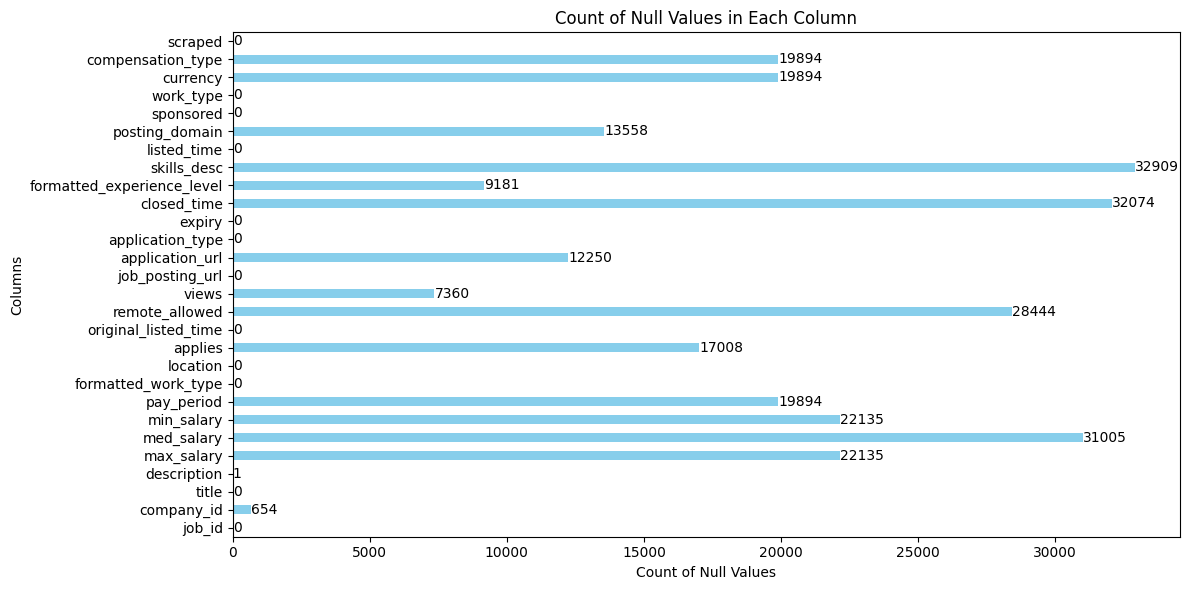

In [117]:
import matplotlib.pyplot as plt

# Get the count of null values in each column
null_counts = jobs.isnull().sum()

plt.figure(figsize=(12, 6))
null_counts.plot(kind='barh', color='skyblue')

plt.title('Count of Null Values in Each Column')
plt.xlabel('Count of Null Values')
plt.ylabel('Columns')

for i, value in enumerate(null_counts):
    plt.text(value, i, str(value), ha='left', va='center')

plt.tight_layout()
plt.show()


In [96]:
jobs.isnull().sum()

job_id                            0
company_id                      654
title                             0
description                       1
max_salary                    22135
med_salary                    31005
min_salary                    22135
pay_period                    19894
formatted_work_type               0
location                          0
applies                       17008
original_listed_time              0
remote_allowed                28444
views                          7360
job_posting_url                   0
application_url               12250
application_type                  0
expiry                            0
closed_time                   32074
formatted_experience_level     9181
skills_desc                   32909
listed_time                       0
posting_domain                13558
sponsored                         0
work_type                         0
currency                      19894
compensation_type             19894
scraped                     

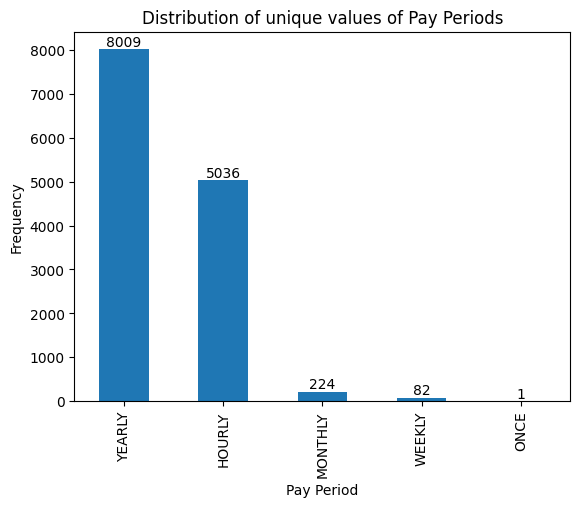

In [118]:
import matplotlib.pyplot as plt

# Generate the count of unique values in the "pay_period" column
pay_period_counts = jobs.pay_period.value_counts()

# Create the bar chart
ax = pay_period_counts.plot(kind='bar')

# Add labels with values on top of each bar
for i in ax.patches:
    ax.text(i.get_x() + i.get_width()/2, i.get_height(), \
            str(round(i.get_height(), 2)), fontsize=10, ha='center', va='bottom')

# Set the title and axis labels
plt.title('Distribution of unique values of Pay Periods')
plt.xlabel('Pay Period')
plt.ylabel('Frequency')

# Show the plot
plt.show()


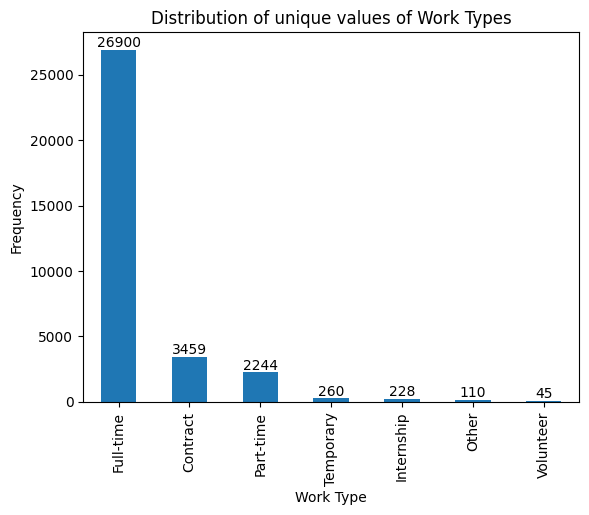

In [119]:
import matplotlib.pyplot as plt

# Generate the count of unique values in the "formatted_work_type" column
work_type_counts = jobs.formatted_work_type.value_counts()

# Create the bar chart
ax = work_type_counts.plot(kind='bar')

# Add labels with values on top of each bar
for i in ax.patches:
    ax.text(i.get_x() + i.get_width()/2, i.get_height(), \
            str(round(i.get_height(), 2)), fontsize=10, ha='center', va='bottom')

# Set the title and axis labels
plt.title('Distribution of unique values of Work Types')
plt.xlabel('Work Type')
plt.ylabel('Frequency')

# Show the plot
plt.show()


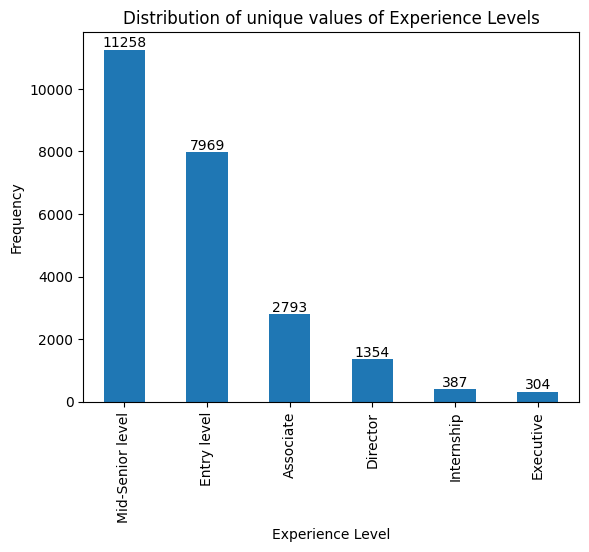

In [120]:
import matplotlib.pyplot as plt

# Generate the count of unique values in the "formatted_experience_level" column
experience_level_counts = jobs.formatted_experience_level.value_counts()

# Create the bar chart
ax = experience_level_counts.plot(kind='bar')

# Add labels with values on top of each bar
for i in ax.patches:
    ax.text(i.get_x() + i.get_width()/2, i.get_height(), \
            str(round(i.get_height(), 2)), fontsize=10, ha='center', va='bottom')

# Set the title and axis labels
plt.title('Distribution of unique values of Experience Levels')
plt.xlabel('Experience Level')
plt.ylabel('Frequency')

# Show the plot
plt.show()


In [121]:
jobs.currency.value_counts()

currency
USD    13352
Name: count, dtype: int64

In [122]:
jobs.compensation_type.value_counts()

compensation_type
BASE_SALARY    13352
Name: count, dtype: int64

All salaries provided are only for the base pay and are in USD currency.